In [1]:
from google.colab import drive
drive.mount("/content/drive")

import sys
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/deeplens/')

Mounted at /content/drive


In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install lenstronomy
!pip3 install deeplenstronomy

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1MB 26kB/s 
     |████████████████████████████████| 8.8MB 1.4MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.2.0+cu92 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
     |████████████████████████████████| 440kB 5.7MB/s 
  Created wheel for lenstronomy: filename=lenstronomy-1.7.0-cp37-none-any.whl size=632852 sha256=6270b0af8ab54f585829a1f91f5c0a0d98d0aee05316f71b5958c95c55ff7948
  Stored in directory: /root/.cache/pip/wheels/80/36/eb/a1bbf501dc372452b939df565ca4da0b5d0f1001b05739ae46
Successfully built lenstronomy
     |████████████████████████████████| 61kB 3.5MB/s 
     |██████████

In [ ]:
!pip3 install matplotlib==3.1.3

     |████████████████████████████████| 13.1MB 265kB/s 
ERROR: deeplenstronomy 0.0.1.6 has requirement matplotlib>=3.3.2, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4


In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
# Open and concatenate the metadata in one data frame
data_repo = '/content/drive/My Drive/Colab Notebooks/deeplens/data/DataSet/'
metadata = pd.DataFrame()
for i in np.arange(1,4):
    file_name = data_repo+'MetaE'+str(i)+'.csv'
    meta = pd.read_csv(file_name)
    metadata = pd.concat([metadata,meta], ignore_index=True)

# Remove fixed data from the metadata - !!!this may change if the configuration file is updated!!!
metadata = metadata.drop(['OBJID-g', 'H0-g', 'Om0-g', 'exposure_time-g', 'numPix-g',
                          'pixel_scale-g', 'psf_type-g', 'read_noise-g', 'ccd_gain-g', 'seeing-g',
                          'magnitude_zero_point-g', 'sky_brightness-g', 'num_exposures-g',
                          'NUMBER_OF_NOISE_SOURCES-g', 'CONFIGURATION_LABEL-g',
                          'CONFIGURATION_NAME-g', 'NUMBER_OF_PLANES-g','PLANE_1-NUMBER_OF_OBJECTS-g', 'PLANE_1-OBJECT_1-NAME-g',
                          'PLANE_2-NUMBER_OF_OBJECTS-g', 'PLANE_2-OBJECT_1-NAME-g', 'PLANE_1-OBJECT_1-REDSHIFT-g',
                          'PLANE_1-OBJECT_1-NUMBER_OF_LIGHT_PROFILES-g','PLANE_1-OBJECT_1-NUMBER_OF_SHEAR_PROFILES-g',
                          'PLANE_1-OBJECT_1-NUMBER_OF_MASS_PROFILES-g', 'PLANE_1-OBJECT_1-HOST-g',
                          'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-NAME-g', 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g',
                          'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-center_x-g',
                          'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-center_y-g', 'PLANE_2-OBJECT_1-REDSHIFT-g',
                          'PLANE_2-OBJECT_1-NUMBER_OF_LIGHT_PROFILES-g', 'PLANE_2-OBJECT_1-NUMBER_OF_SHEAR_PROFILES-g',
                          'PLANE_2-OBJECT_1-NUMBER_OF_MASS_PROFILES-g', 'PLANE_2-OBJECT_1-HOST-g',
                          'PLANE_1-OBJECT_1-MASS_PROFILE_1-center_x-g', 'PLANE_1-OBJECT_1-MASS_PROFILE_1-center_y-g',
                          'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-NAME-g', 'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g',
                          'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-center_x-g', 'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-center_y-g', 
                          'BACKGROUND_IDX-g', 'PLANE_1-REDSHIFT-g', 'PLANE_2-REDSHIFT-g', 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-R_sersic-g',
                          'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-n_sersic-g', 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-e1-g',
                          'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-e2-g','PLANE_1-OBJECT_1-MASS_PROFILE_1-NAME-g'],axis=1)

In [ ]:
metadata.columns

Index(['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g',
       'PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g',
       'PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g',
       'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-R_sersic-g',
       'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-n_sersic-g',
       'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e1-g',
       'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e2-g', 'class', 'ID'],
      dtype='object')

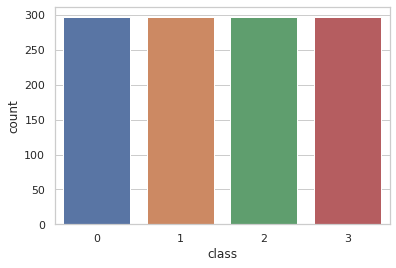

In [ ]:
ax = sns.countplot(metadata['class'],label="Count")
fig = ax.get_figure()
fig.savefig('class.png')

In [ ]:
metadata_noerror = metadata.loc[metadata['class'] == 0]
metadata_masserror = metadata.loc[metadata['class'] == 1]

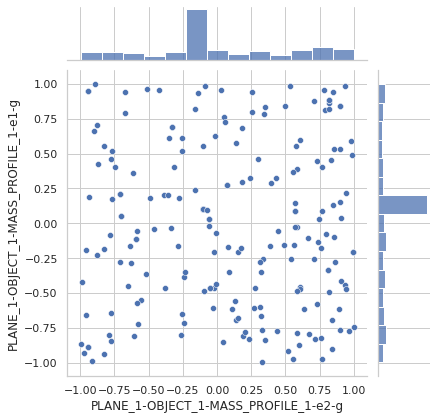

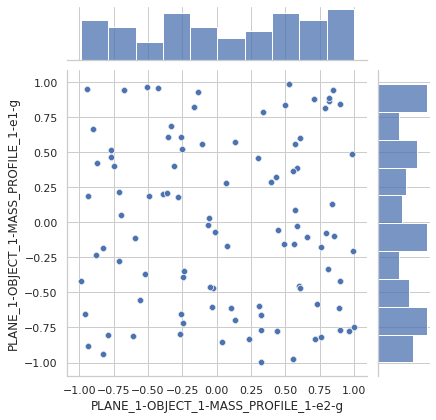

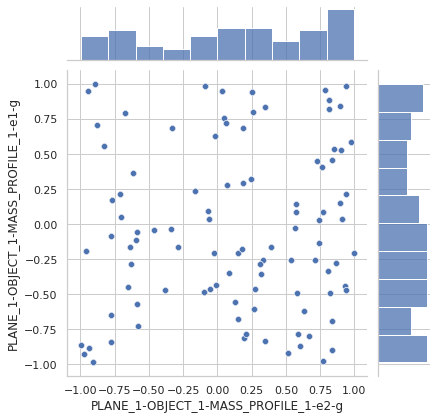

In [ ]:
metadata_noerror = metadata.loc[metadata['class'] == 0]
metadata_masserror = metadata.loc[metadata['class'] == 1]
metadata_lighterror = metadata.loc[metadata['class'] == 2]
metadata_masslighterror = metadata.loc[metadata['class'] == 3]

sns.set_style("whitegrid")
sns.jointplot(x=metadata_noerror['PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g'], y=metadata_noerror['PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g']);

sns.set_style("whitegrid")
sns.jointplot(x=metadata_masserror['PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g'], y=metadata_masserror['PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g']);

sns.set_style("whitegrid")
sns.jointplot(x=metadata_masslighterror['PLANE_1-OBJECT_1-MASS_PROFILE_1-e2-g'], y=metadata_masslighterror['PLANE_1-OBJECT_1-MASS_PROFILE_1-e1-g']);

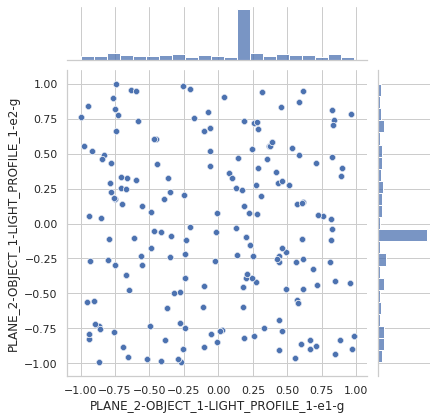

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x=metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e1-g'], y=metadata['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e2-g']);